In [33]:
from langchain import OpenAI
from langchain.prompts import PromptTemplate
import openai

In [2]:
import os

from dotenv import load_dotenv
load_dotenv()

openai.api_key = os.environ['openai_api_key']

In [9]:
from langchain.document_loaders import PyPDFLoader

pdf_path = r"data\HFCL_conference_call.pdf"
loader = PyPDFLoader(pdf_path)
pages = loader.load_and_split()
print(pages[1].page_content)

Page 1 of 20 
   
“HFCL Limited  
Q4 FY '23  Results  Conference Call ” 
May 09, 202 3 
  
 
 
    
 
 
 
MANAGEMENT : MR. MAHENDRA NAHATA – MANAGING  DIRECTOR  & 
PROMOTER  
 MR.V R JAIN –  CHIEF  FINANCIAL  OFFICER  
 MR. MANOJ BAID – COMPANY  SECRETARY  
 MR. AMIT AGARWAL – HEAD INVESTOR  RELATIONS  
                                     
 
Moderator:  Ladies and gentlemen, good day and welcome to the HFCL Q4FY23 Results Conference Call 
hosted by ICICI Securities. As a reminder, al l particip ants lines will be in the listen -only mode 
and there will be an opportunity for you to ask questions after the presentation concludes. Should 
you need any assistance during the conference call, please signal an operator by pressing star


In [20]:
for page in pages[2:]:
#     print("__________________________",page.page_content)
    with open("hfcl_earning_transcript.txt","a",encoding='utf-8') as txt_file:
        txt_file.write(page.page_content)

__________________________ HFCL Limited  
  May 09 , 202 3 
 
Page 2 of 20 
 
then zero  on your touch phone. Please note that this conference is being recorded. I now hand 
the conference over to Mr. Mahendra Nahata , MD HFCL . Thank you and over to you, sir.  
Mahendra Nahata:  Good afternoon, ladies and gentlemen. I'm sorry for a little delay, i t happened because of some 
connectivity issues.  
I am delighted to welcome you all to HFCL’s earnings call for the fourth quarter and financial 
year ended 23. I trust that you got a chance to review our financial results, press release, and 
investor presen tation, all of which are available on the website of the Company  and also on the 
website of stock exchanges.  
During FY23, the global economy faced challenges such as financial market volatility, high 
inflation, and slower growth. However, despite these hea dwinds, India remains a promising 
economy and is expected to emerge as the fastest -growing in the world.  
The telecom indus

In [3]:
llm = OpenAI(temperature=0.7)

In [4]:
prompt = """
Please provide a summary of the following text

TEXT:
Philosophy (from Greek: φιλοσοφία, philosophia, 'love of wisdom') \
is the systematized study of general and fundamental questions, \
such as those about existence, reason, knowledge, values, mind, and language. \
Some sources claim the term was coined by Pythagoras (c. 570 – c. 495 BCE), \
although this theory is disputed by some. Philosophical methods include questioning, \
critical discussion, rational argument, and systematic presentation.
"""

In [5]:
num_tokens = llm.get_num_tokens(prompt)
print (f"Our prompt has {num_tokens} tokens")

Our prompt has 121 tokens


In [6]:
output = llm(prompt)
print (output)


Philosophy is an ancient discipline that examines fundamental questions and problems, often addressing them with reasoned arguments. It encompasses a broad range of subjects, including ethics, aesthetics, epistemology, logic, metaphysics, and the study of language. It is often considered the study of fundamental truths about existence, reason, knowledge, and values.


In [21]:
from langchain.chains.summarize import load_summarize_chain
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [25]:
with open("hfcl_earning_transcript.txt", 'r', encoding='utf-8') as read_file:
    data = read_file.read()

In [26]:
llm.get_num_tokens(data)

14154

In [28]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n"], chunk_size=10000, chunk_overlap=500)

docs = text_splitter.create_documents([data])


In [29]:
num_docs = len(docs)

num_tokens_first_doc = llm.get_num_tokens(docs[0].page_content)

print (f"Now we have {num_docs} documents and the first one has {num_tokens_first_doc} tokens")

Now we have 6 documents and the first one has 2340 tokens


In [30]:

summary_chain = load_summarize_chain(llm=llm, chain_type='map_reduce',
#                                      verbose=True # Set verbose=True if you want to see the prompts being used
                                    )

In [31]:
output = summary_chain.run(docs)
output

' HFCL Limited held an earnings call to discuss their financial performance in the fourth quarter of financial year ended 2023. Despite global economic challenges, the company is expecting higher revenue and profitability due to strategic initiatives such as capacity expansion, product development, R&D, and geographical expansion. Revenue mix from products and turnkey services, and optical fiber order book percentage were discussed. 5G products are expected to start coming to market in the next two to three months and orders from operators are likely to start being executed in the third quarter of the current financial year.'

In [34]:
map_prompt = """
Write a concise summary of the following:
"{text}"
CONCISE SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [35]:
combine_prompt = """
Write a concise summary of the following text delimited by triple backquotes.
Return your response in bullet points which covers the key points of the text.
```{text}```
BULLET POINT SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [36]:
summary_chain = load_summarize_chain(llm=llm,
                                     chain_type='map_reduce',
                                     map_prompt=map_prompt_template,
                                     combine_prompt=combine_prompt_template,
#                                      verbose=True
                                    )

In [37]:
output = summary_chain.run(docs)


In [70]:
print(output)

- HFCL Limited reported consolidated revenue of ₹4743 Crores, EBIDTA of ₹665 Crores, Profit before Tax of ₹430 Crores and Profit after Tax of ₹317 Crores for the twelve months ended 31st March 2023. 
- Strategic initiatives such as expansion of capacities, launch of indigenously designed products, investment in R&D and geographical expansion are planned to increase margins by 4-5% in 2-3 years.
- The demand for optical fiber cables has increased significantly due to the implementation of 5G and other networks. 
- HFCL is increasing its production capacity and exports have increased by 125%.
- R&D initiatives have been taken to produce new telecom and networking products.
- Mahendra Nahata of HFCL Limited discussed the benefits of integration, noting that fiber optic cable revenue had increased from INR 1,200 crores to INR 2,300 crores in the last financial year. 
- 56% of revenue came from products, of which 87% was from optical fiber cable. 
- Prices had increased by 10%, and 5G produ

### Best Representation Vectors - Summarize an entire book

In [39]:
# Combine the pages, and replace the tabs with spaces
text = ""

for page in pages[2:-1]:
    text += page.page_content
    
text = text.replace('\t', ' ')

In [40]:
num_tokens = llm.get_num_tokens(text)

print (f"This book has {num_tokens} tokens in it")

This book has 13828 tokens in it


In [42]:
# Loaders
from langchain.schema import Document

# Splitters
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Model
from langchain.chat_models import ChatOpenAI

# Embedding Support
from langchain.vectorstores import FAISS
from langchain.embeddings import OpenAIEmbeddings

# Summarizer we'll use for Map Reduce
from langchain.chains.summarize import load_summarize_chain

# Data Science
import numpy as np
from sklearn.cluster import KMeans

In [43]:
text_splitter = RecursiveCharacterTextSplitter(separators=["\n\n", "\n", "\t"], chunk_size=10000, chunk_overlap=3000)

docs = text_splitter.create_documents([text])

In [44]:
num_documents = len(docs)

print (f"Now our book is split up into {num_documents} documents")

Now our book is split up into 8 documents


In [45]:
embeddings = OpenAIEmbeddings()

vectors = embeddings.embed_documents([x.page_content for x in docs])

In [46]:
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(vectors)

In [47]:
kmeans.labels_

array([4, 1, 1, 3, 3, 2, 2, 0])

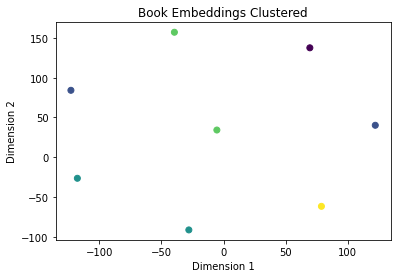

In [48]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Taking out the warnings
import warnings
from warnings import simplefilter

# Filter out FutureWarnings
simplefilter(action='ignore', category=FutureWarning)

# Perform t-SNE and reduce to 2 dimensions
tsne = TSNE(n_components=2, random_state=42)
reduced_data_tsne = tsne.fit_transform(vectors)

# Plot the reduced data
plt.scatter(reduced_data_tsne[:, 0], reduced_data_tsne[:, 1], c=kmeans.labels_)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Book Embeddings Clustered')
plt.show()

In [49]:
closest_indices = []

# Loop through the number of clusters you have
for i in range(num_clusters):
    
    # Get the list of distances from that particular cluster center
    distances = np.linalg.norm(vectors - kmeans.cluster_centers_[i], axis=1)
    
    # Find the list position of the closest one (using argmin to find the smallest distance)
    closest_index = np.argmin(distances)
    
    # Append that position to your closest indices list
    closest_indices.append(closest_index)

In [50]:
selected_indices = sorted(closest_indices)
selected_indices

[0, 1, 3, 5, 7]

In [52]:
llm3 = ChatOpenAI(temperature=0,
                 max_tokens=1000,
                 model='gpt-3.5-turbo'
                )

In [53]:
map_prompt = """
You will be given a single passage of a book. This section will be enclosed in triple backticks (```)
Your goal is to give a summary of this section so that a reader will have a full understanding of what happened.
Your response should be at least three paragraphs and fully encompass what was said in the passage.

```{text}```
FULL SUMMARY:
"""
map_prompt_template = PromptTemplate(template=map_prompt, input_variables=["text"])

In [54]:
map_chain = load_summarize_chain(llm=llm3,
                             chain_type="stuff",
                             prompt=map_prompt_template)

In [55]:
selected_docs = [docs[doc] for doc in selected_indices]


In [56]:
# Make an empty list to hold your summaries
summary_list = []

# Loop through a range of the lenght of your selected docs
for i, doc in enumerate(selected_docs):
    
    # Go get a summary of the chunk
    chunk_summary = map_chain.run([doc])
    
    # Append that summary to your list
    summary_list.append(chunk_summary)
    
    print (f"Summary #{i} (chunk #{selected_indices[i]}) - Preview: {chunk_summary[:250]} \n")

Summary #0 (chunk #0) - Preview: The MD of HFCL, Mahendra Nahata, held an earnings conference call for the fourth quarter and financial year ended in 2023. Despite challenges in the global economy like inflation and slower growth, India is expected to emerge as the fastest-growing e 

Summary #1 (chunk #1) - Preview: In this section, it is discussed that the Company is expanding its optic fiber capacity from existing 10mn fkm to 25mn fkm by Q2 of FY25, with the aim of generating additional profitability of ~Rs.150 crores annually. This expansion in optic fiber ca 

Summary #2 (chunk #3) - Preview: The passage discusses the recent success of HFCL Limited, a telecommunications company, in meeting the demand of their customers and increasing their exports by 125% in the previous financial year. They have set a target to export fiber optic cable b 

Summary #3 (chunk #5) - Preview: The passage highlights a discussion between Sahil Sanghvi, an analyst, and Mahendra Nahata, the Chairman and 

In [57]:
summaries = "\n".join(summary_list)

# Convert it back to a document
summaries = Document(page_content=summaries)

print (f"Your total summary has {llm.get_num_tokens(summaries.page_content)} tokens")

Your total summary has 1691 tokens


In [66]:
llm4 = ChatOpenAI(temperature=0,
                 max_tokens=3000,
                 model='gpt-3.5-turbo',
                 request_timeout=120
                )

In [67]:
combine_prompt = """
You will be given a series of summaries from a book. The summaries will be enclosed in triple backticks (```)
Your goal is to give a verbose summary of what happened in the story.
The reader should be able to grasp what happened in the book.

```{text}```
VERBOSE SUMMARY:
"""
combine_prompt_template = PromptTemplate(template=combine_prompt, input_variables=["text"])

In [68]:
reduce_chain = load_summarize_chain(llm=llm4,
                             chain_type="stuff",
                             prompt=combine_prompt_template,
#                              verbose=True # Set this to true if you want to see the inner workings
                                   )

In [72]:
output = reduce_chain.run([summaries]) 

In [73]:
print(output)

- HFCL Limited reported consolidated revenue of ₹4743 Crores, EBIDTA of ₹665 Crores, Profit before Tax of ₹430 Crores and Profit after Tax of ₹317 Crores for the twelve months ended 31st March 2023. 
- Strategic initiatives such as expansion of capacities, launch of indigenously designed products, investment in R&D and geographical expansion are planned to increase margins by 4-5% in 2-3 years.
- The demand for optical fiber cables has increased significantly due to the implementation of 5G and other networks. 
- HFCL is increasing its production capacity and exports have increased by 125%.
- R&D initiatives have been taken to produce new telecom and networking products.
- Mahendra Nahata of HFCL Limited discussed the benefits of integration, noting that fiber optic cable revenue had increased from INR 1,200 crores to INR 2,300 crores in the last financial year. 
- 56% of revenue came from products, of which 87% was from optical fiber cable. 
- Prices had increased by 10%, and 5G produ